# 4. Field of 11 inclined boreholes with curved trajectories : (b) Simulation
The model is used to simulate the borefield over a 10-year period with variable heat extraction rate and fluid mass flow rate.

In [1]:
# Import necessary packages
import geothermax as gm

import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator

## 4(b).1. Borehole trajectories
The position of the drill was recorded every 10 meters, nominally. The measurements are used to construct polynomial trajectories for the model.

In [2]:
# Points along the trajectories from the drilling logs

D = 2.
offset = jnp.array(
    [
        # [0., 0., -D],
        [0.375186, 1.79956, -D],
        [3.68243, 7.01754, -D],
        [-1.93403, 0.202918, -D],
        [4.92656, 5.57329, -D],
        [3.49819, 1.13551, -D],
        [0.684666, 9.22355, -D],
        [-0.8747, 8.149, -D],
        [0.639719, 4.73926, -D],
        [-5.41151, 0.675605, -D],
        [-2.86632, 2.43128, -D],
        [-2.50714, 7.098, -D],
    ]
)
p = [

        # Borehole 0 is not part of the system and only used for research
        # jnp.array([
        #     [0.00, 0.00, 0.],
        #     [0.01, 0.00, -10.],
        #     [-0.01, 0.01, -20.],
        #     [-0.02, 0.03, -30.],
        #     [0.00, 0.06, -40.],
        #     [0.04, 0.09, -50.],
        #     [0.09, 0.14, -60.],
        #     [0.17, 0.20, -70.],
        #     [0.27, 0.27, -80.],
        #     [0.40, 0.36, -90.],
        #     [0.55, 0.46, -100.],
        # ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.61, 1.37, -9.84],
            [-0.38, 3.15, -19.68],
            [-0.14, 4.95, -29.51],
            [0.10, 6.73, -39.35],
            [0.28, 8.58, -49.18],
            [0.44, 10.47, -59.00],
            [0.55, 12.36, -68.81],
            [0.60, 14.29, -78.63],
            [0.64, 16.25, -88.43],
            [0.63, 18.27, -98.23],
            [0.57, 20.32, -108.01],
            [0.45, 22.41, -117.79],
            [0.29, 24.54, -127.56],
            [0.11, 26.68, -137.33],
            [-0.08, 28.82, -147.09],
            [-0.25, 30.99, -156.85],
            [-0.35, 33.21, -166.60],
            [-0.38, 35.42, -176.36],
            [-0.38, 37.63, -186.11],
            [-0.35, 39.89, -195.85],
            [-0.32, 42.19, -205.58],
            [-0.34, 44.50, -215.31],
            [-0.38, 45.66, -220.18],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.67, 0.54, -9.85],
            [2.16, -0.21, -19.71],
            [3.77, -0.81, -29.55],
            [5.55, -1.14, -39.39],
            [7.28, -1.71, -49.22],
            [9.02, -2.26, -59.05],
            [10.75, -2.63, -68.89],
            [12.47, -3.00, -78.73],
            [14.19, -3.22, -88.58],
            [15.88, -3.54, -98.43],
            [17.59, -3.86, -108.28],
            [19.33, -4.20, -118.12],
            [21.05, -4.61, -127.96],
            [22.82, -4.86, -137.80],
            [24.62, -5.16, -147.63],
            [26.36, -5.51, -157.47],
            [28.15, -5.74, -167.30],
            [30.01, -6.09, -177.12],
            [31.72, -6.62, -186.96],
            [33.31, -7.28, -196.81],
            [34.87, -7.90, -206.67],
            [36.33, -8.33, -216.55],
            [37.02, -8.57, -221.50],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.05, -0.21, -9.85],
            [-1.77, -0.14, -19.70],
            [-3.44, -0.05, -29.56],
            [-5.06, 0.14, -39.42],
            [-6.64, 0.44, -49.30],
            [-8.24, 0.70, -59.16],
            [-9.91, 1.05, -69.02],
            [-11.58, 1.40, -78.87],
            [-13.26, 1.66, -88.72],
            [-14.93, 1.98, -98.58],
            [-16.56, 2.34, -108.44],
            [-18.07, 2.76, -118.31],
            [-19.51, 3.18, -128.20],
            [-20.86, 3.49, -138.10],
            [-22.10, 3.76, -148.02],
            [-23.30, 3.96, -157.95],
            [-24.46, 4.08, -167.88],
            [-25.57, 4.16, -177.82],
            [-26.63, 4.22, -187.76],
            [-27.70, 4.28, -197.70],
            [-28.76, 4.33, -207.65],
            [-29.79, 4.42, -217.59],
            [-30.29, 4.50, -222.57],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.52, 0.47, -9.97],
            [1.15, 0.78, -19.95],
            [1.78, 1.06, -29.92],
            [2.24, 1.60, -39.89],
            [2.65, 2.18, -49.87],
            [3.04, 2.78, -59.84],
            [3.43, 3.43, -69.81],
            [3.86, 4.13, -79.78],
            [4.34, 4.89, -89.74],
            [4.81, 5.66, -99.70],
            [5.27, 6.45, -109.66],
            [5.72, 7.27, -119.61],
            [6.19, 8.12, -129.56],
            [6.70, 9.02, -139.51],
            [7.29, 9.95, -149.45],
            [7.92, 10.88, -159.39],
            [8.59, 11.81, -169.32],
            [9.25, 12.72, -179.26],
            [9.93, 13.61, -189.19],
            [10.63, 14.50, -199.13],
            [11.29, 15.40, -209.07],
            [11.90, 16.28, -219.01],
            [12.52, 17.12, -228.96],
            [13.17, 17.92, -238.90],
            [13.84, 18.64, -248.85],
            [14.52, 19.30, -258.81],
            [15.19, 19.99, -268.76],
            [15.85, 20.69, -278.71],
            [16.53, 21.33, -288.67],
            [17.20, 21.99, -298.63],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.57, 0.73, -9.94],
            [1.58, 1.12, -19.88],
            [2.59, 1.49, -29.83],
            [3.65, 1.87, -39.76],
            [4.72, 2.30, -49.70],
            [5.82, 2.75, -59.63],
            [6.94, 3.26, -69.55],
            [8.05, 3.80, -79.47],
            [9.13, 4.34, -89.40],
            [10.21, 4.97, -99.32],
            [11.33, 5.62, -109.24],
            [12.50, 6.25, -119.15],
            [13.69, 6.86, -129.06],
            [14.86, 7.55, -138.96],
            [16.06, 8.30, -148.86],
            [17.33, 9.05, -158.75],
            [18.60, 9.81, -168.64],
            [19.88, 10.58, -178.53],
            [21.21, 11.35, -188.41],
            [22.63, 11.99, -198.29],
            [24.07, 12.59, -208.17],
            [25.51, 13.26, -218.04],
            [26.96, 13.87, -227.92],
            [28.38, 14.54, -237.79],
            [29.79, 15.29, -247.66],
            [31.23, 16.05, -257.53],
            [32.69, 16.81, -267.39],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.60, -0.09, -9.95],
            [1.52, -0.86, -19.88],
            [2.41, -1.68, -29.81],
            [3.33, -2.47, -39.73],
            [4.25, -3.22, -49.66],
            [5.20, -3.99, -59.59],
            [6.21, -4.76, -69.51],
            [7.22, -5.49, -79.43],
            [8.26, -6.18, -89.35],
            [9.35, -6.87, -99.27],
            [10.54, -7.57, -109.17],
            [11.74, -8.34, -119.07],
            [12.93, -9.17, -128.96],
            [14.21, -9.94, -138.85],
            [15.58, -10.70, -148.73],
            [17.02, -11.59, -158.58],
            [18.52, -12.60, -168.42],
            [19.90, -13.77, -178.25],
            [21.39, -14.93, -188.07],
            [23.10, -16.00, -197.86],
            [24.84, -17.13, -207.64],
            [26.63, -18.28, -217.41],
            [28.48, -19.45, -227.17],
            [30.36, -20.56, -236.93],
            [32.28, -21.69, -246.68],
            [34.22, -22.91, -256.41],
            [36.16, -24.21, -266.13],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.27, -0.36, -9.99],
            [0.50, -1.02, -19.96],
            [0.73, -1.65, -29.94],
            [0.95, -2.25, -39.92],
            [1.13, -2.85, -49.90],
            [1.34, -3.47, -59.88],
            [1.57, -4.09, -69.86],
            [1.75, -4.71, -79.83],
            [1.94, -5.36, -89.81],
            [2.21, -5.97, -99.79],
            [2.48, -6.58, -109.77],
            [2.71, -7.25, -119.74],
            [2.95, -7.93, -129.71],
            [3.21, -8.59, -139.69],
            [3.47, -9.31, -149.66],
            [3.83, -10.10, -159.62],
            [4.33, -10.91, -169.58],
            [4.90, -11.75, -179.52],
            [5.55, -12.66, -189.46],
            [6.28, -13.56, -199.39],
            [7.10, -14.49, -209.32],
            [7.98, -15.47, -219.23],
            [8.97, -16.51, -229.13],
            [10.03, -17.65, -239.00],
            [11.09, -18.91, -248.87],
            [12.16, -20.28, -258.72],
            [13.22, -21.73, -268.55],
            [14.28, -23.25, -278.38],
            [15.40, -24.86, -288.19],
            [16.56, -26.50, -297.98],
            [17.72, -28.18, -307.77],
            [18.82, -29.92, -317.56],
            [19.89, -31.68, -327.34],
            [20.92, -33.48, -337.12],
            [21.86, -35.36, -346.90],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.09, -0.08, -9.98],
            [-0.40, -0.66, -19.96],
            [-0.74, -1.18, -29.94],
            [-1.11, -1.67, -39.92],
            [-1.47, -2.17, -49.90],
            [-1.86, -2.63, -59.89],
            [-2.29, -3.07, -69.87],
            [-2.73, -3.49, -79.85],
            [-3.21, -3.86, -89.83],
            [-3.72, -4.19, -99.81],
            [-4.25, -4.48, -109.79],
            [-4.74, -4.78, -119.78],
            [-5.19, -5.09, -129.76],
            [-5.60, -5.40, -139.75],
            [-5.96, -5.78, -149.73],
            [-6.26, -6.26, -159.72],
            [-6.48, -6.82, -169.70],
            [-6.64, -7.42, -179.68],
            [-6.81, -8.06, -189.66],
            [-6.94, -8.77, -199.63],
            [-7.02, -9.59, -209.60],
            [-7.10, -10.48, -219.56],
            [-7.13, -11.40, -229.52],
            [-7.09, -12.40, -239.46],
            [-6.93, -13.46, -249.41],
            [-6.66, -14.58, -259.34],
            [-6.38, -15.76, -269.27],
            [-6.17, -17.00, -279.19],
            [-6.00, -18.32, -289.10],
            [-5.83, -19.70, -299.00],
            [-5.66, -21.10, -308.90],
            [-5.48, -22.50, -318.80],
            [-5.31, -23.95, -328.69],
            [-5.19, -25.46, -338.58],
            [-5.10, -27.02, -348.45],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.64, 0.32, -9.94],
            [-1.69, 0.00, -19.88],
            [-2.73, -0.35, -29.82],
            [-3.71, -0.70, -39.77],
            [-4.69, -1.03, -49.72],
            [-5.67, -1.32, -59.66],
            [-6.65, -1.57, -69.61],
            [-7.62, -1.81, -79.56],
            [-8.59, -2.07, -89.51],
            [-9.54, -2.35, -99.46],
            [-10.48, -2.66, -109.41],
            [-11.38, -2.99, -119.37],
            [-12.25, -3.33, -129.32],
            [-13.09, -3.69, -139.28],
            [-13.86, -4.19, -149.24],
            [-14.58, -4.85, -159.19],
            [-15.22, -5.61, -169.14],
            [-15.79, -6.48, -179.09],
            [-16.33, -7.49, -189.02],
            [-16.88, -8.71, -198.93],
            [-17.48, -10.07, -208.82],
            [-18.13, -11.47, -218.70],
            [-18.81, -12.90, -228.57],
            [-19.46, -14.39, -238.44],
            [-20.06, -15.93, -248.30],
            [-20.57, -17.49, -258.17],
            [-20.91, -19.08, -268.03],
            [-21.15, -20.72, -277.89],
            [-21.34, -22.41, -287.75],
            [-21.49, -24.14, -297.60],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-1.06, 0.35, -9.92],
            [-1.99, 1.19, -19.85],
            [-2.94, 2.00, -29.77],
            [-3.96, 2.78, -39.68],
            [-4.98, 3.57, -49.60],
            [-5.91, 4.34, -59.53],
            [-6.84, 5.12, -69.45],
            [-7.83, 5.94, -79.37],
            [-8.89, 6.83, -89.27],
            [-9.99, 7.76, -99.17],
            [-11.14, 8.67, -109.06],
            [-12.28, 9.58, -118.95],
            [-13.40, 10.49, -128.85],
            [-14.50, 11.39, -138.75],
            [-15.64, 12.20, -148.65],
            [-16.80, 12.90, -158.56],
            [-17.95, 13.59, -168.47],
            [-19.13, 14.27, -178.37],
            [-20.29, 15.00, -188.28],
            [-21.41, 15.80, -198.18],
            [-22.52, 16.56, -208.09],
            [-23.65, 17.32, -218.00],
            [-24.79, 18.07, -227.91],
            [-25.97, 18.79, -237.81],
            [-27.15, 19.52, -247.71],
            [-28.33, 20.27, -257.61],
            [-29.57, 21.01, -267.51],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.64, 0.31, -9.96],
            [-0.94, 0.97, -19.93],
            [-1.30, 1.61, -29.91],
            [-1.62, 2.29, -39.88],
            [-1.88, 2.99, -49.85],
            [-2.19, 3.67, -59.82],
            [-2.51, 4.45, -69.79],
            [-2.82, 5.23, -79.75],
            [-3.21, 5.94, -89.72],
            [-3.60, 6.72, -99.68],
            [-3.94, 7.51, -109.64],
            [-4.33, 8.30, -119.60],
            [-4.76, 9.14, -129.56],
            [-5.10, 10.00, -139.52],
            [-5.37, 10.84, -149.48],
            [-5.63, 11.70, -159.44],
            [-5.92, 12.60, -169.39],
            [-6.24, 13.53, -179.34],
            [-6.48, 14.48, -189.29],
            [-6.67, 15.42, -199.25],
            [-6.87, 16.36, -209.20],
            [-7.01, 17.30, -219.16],
            [-7.12, 18.23, -229.11],
            [-7.28, 19.12, -239.07],
            [-7.47, 20.00, -249.03],
            [-7.68, 20.86, -258.99],
            [-7.89, 21.68, -268.96],
            [-8.09, 22.45, -278.92],
            [-8.31, 23.16, -288.90],
            [-8.57, 23.83, -298.87],
        ])

    ]

p = [_p + _offset for _p, _offset in zip(p, offset)]

A 6th order polynomial is used to represent the trajectory of each borehole.

In [3]:
paths = [gm.Path(jnp.linspace(-1., 1., num=_p.shape[0]), _p, order=6, s_order=10) for _p in p]

# 4(b).2. Simulation of the borefield

### 4(b).2.1. Simulation parameters

In [4]:
m_flow = 0.375  # Fluid mass flow rate (in kg/s)
m_flow_network = m_flow * len(paths)  # Fluid mass flow rate (in kg/s)
cp_f = 3977.    # Fluid specific heat capacity (in J/kg-K)

# Delta-circuit thermal resistances (in m-K/W)
R_d = jnp.array(
    [
        [0.28669298, -3.18697907],
        [-3.18697907, 0.28669298]
    ]
)

r_b = 0.075

In [5]:
dt = 3600.              # Time step
tmax = 10 * 8760 * 3600.    # Maximum time
alpha = 1e-6
k_s = 2.
T0 = 10.

### 4(b).2.2. Initialization of `Borefield` object
5 segments of 7 nodes are used for the evaluation of the $g$-functions. The trajectories of the boreholes are very close near the top. The discretization is thus refined near the top of the boreholes.

In [6]:
n_nodes = 7
n_segments = 5
segment_ratios = jnp.array([0.05, 0.1, 0.3, 0.3, 0.25])
basis = gm.Basis.Legendre(n_nodes)

In [7]:
boreholes = [
    gm.SingleUTube(R_d, r_b, path, basis, n_segments, segment_ratios=segment_ratios)
    for path in paths
]
borefield = gm.Network(boreholes)

### 4(b).2.3. Simulation
The simulation uses the synthetic asymmetric heat extraction rate profile of Pinel [1]. The profile is repeated every year of the simulation and scaled by `18.53` since the original profile was intended for a single borehole. This number is chosen so that the maximum temperature difference is 5 degrees Celsius at peak.

In [8]:
def synthetic_load(x, scaling=1):
    """
    Synthetic load profile of Pinel (2003).

    Returns load y (in watts) at time x (in seconds).
    """
    x = x / 3600.
    A = 2000.
    B = 1000.
    C = 80.0
    D = 4. / 3
    E = 0.01
    F = 2190.
    G = 0.95

    q_1 = A * jnp.sin(jnp.pi / 12 * (x - B)) * jnp.sin(D * jnp.pi / 8760 * (x - B))

    i = jnp.arange(1, 4)
    q_2 = (168. - C) / 168
    for _i in i:
        q_2 = q_2 + 1. / (_i * jnp.pi) * (jnp.cos(C * jnp.pi * _i / 84.) - 1) * jnp.sin(jnp.pi * _i / 84 * (x - B))
    FL = jnp.floor(D / 8760 * (x - B))
    SN = jnp.sign(jnp.cos(D * jnp.pi / 4380 * (x + F)) + G)

    y = q_1 * q_2 + (-1)**FL * jnp.abs(q_1 * q_2) + E * (-1)**FL * SN
    return -y * scaling

In [9]:
time = jnp.arange(1, 8761) * 3600.
Q = synthetic_load(time, scaling=18.53)

The fluid mass flow rate is modulated proportionally to the heat extraction/injection rate to keep a constant 5 degree Celsius difference between inlet and outlet, with a minimum fluid mass flow rate of 30% of the maximum.

In [10]:
def f_m_flow(_Q, Q_small=1.):
    return jnp.maximum(0.3 * m_flow_network, jnp.abs(_Q) / (5 * cp_f)) * jnp.heaviside(jnp.abs(_Q) - Q_small, 1.)

Simulate the system. This takes a little over an hour.

In [11]:
simulation = gm.Simulation(borefield, cp_f, dt, tmax, T0, alpha, k_s)
simulation.simulate(Q, f_m_flow)

Simulation start.
Completed 100 of 87600 time steps. Elapsed time: 23.45 seconds.
Completed 200 of 87600 time steps. Elapsed time: 27.92 seconds.
Completed 300 of 87600 time steps. Elapsed time: 32.56 seconds.
Completed 400 of 87600 time steps. Elapsed time: 37.42 seconds.
Completed 500 of 87600 time steps. Elapsed time: 42.03 seconds.
Completed 600 of 87600 time steps. Elapsed time: 47.55 seconds.
Completed 700 of 87600 time steps. Elapsed time: 52.76 seconds.
Completed 800 of 87600 time steps. Elapsed time: 57.64 seconds.
Completed 900 of 87600 time steps. Elapsed time: 63.13 seconds.
Completed 1000 of 87600 time steps. Elapsed time: 67.91 seconds.
Completed 1100 of 87600 time steps. Elapsed time: 73.60 seconds.
Completed 1200 of 87600 time steps. Elapsed time: 78.85 seconds.
Completed 1300 of 87600 time steps. Elapsed time: 83.54 seconds.
Completed 1400 of 87600 time steps. Elapsed time: 87.45 seconds.
Completed 1500 of 87600 time steps. Elapsed time: 91.71 seconds.
Completed 1600 o

Plot results.

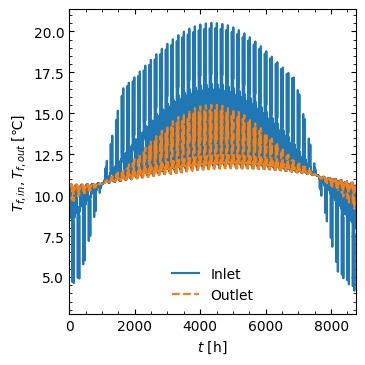

In [12]:
# Plot fluid temperatures during last year
fig, ax = plt.subplots(layout='constrained')

ax = gm.utilities._format_axis(ax, axis_labels=[r'$t$ [h]', r'$T_{f,in}, T_{f,out}$ [℃]'])
time = jnp.arange(simulation.n_times) - 9 * 8760
ax.plot(time, simulation.T_f_in, '-', label='Inlet');
ax.plot(time, simulation.T_f_out, '--', label='Outlet');
ax.legend(frameon=False)
fig.set_size_inches(90. / 25.4, 90. / 25.4)
ax.set_xlim(0, 8760)
fig.savefig('last-year-KTH.eps')

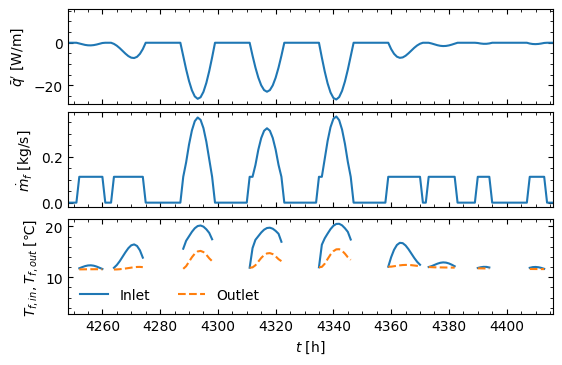

In [13]:
# Plot simulation results during peak of last year
fig, axs = plt.subplots(nrows=3, layout='constrained', sharex=True)
time = jnp.arange(simulation.n_times) - 9 * 8760

axs[0] = gm.utilities._format_axis(axs[0], axis_labels=[None, r'$\bar{q}^\prime$ [W/m]'])
axs[0].plot(time, simulation.Q / borefield.L.sum(), '-');

axs[1] = gm.utilities._format_axis(axs[1], axis_labels=[None, r'$\dot{m}_{f}$ [kg/s]'])
axs[1].plot(time, simulation.m_flow / len(paths), '-');

axs[2] = gm.utilities._format_axis(axs[2], axis_labels=[r'$t$ [h]', r'$T_{f,in}, T_{f,out}$ [℃]'])
axs[2].plot(time, simulation.T_f_in, '-', label='Inlet');
axs[2].plot(time, simulation.T_f_out, '--', label='Outlet');
axs[2].legend(frameon=False, ncols=2)
fig.set_size_inches(140. / 25.4, 90. / 25.4)
axs[2].set_xlim(177 * 24, 184 * 24)
fig.savefig('peak-week-KTH.eps')